In [2]:
#Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

In [12]:
dados1 = pd.read_excel('previsao_chuva.xlsx')
dados1.head()

codigo_estacao       data  hora  temp_inst  temp_max  temp_min  umid_inst  \
0           A401 2018-11-06     8       24.6      25.0      24.6         78   
1           A401 2018-11-06    16       29.9      31.1      29.8         56   
2           A401 2018-11-06     4       24.7      25.2      24.7         77   
3           A401 2018-11-06    11       27.3      27.6      26.7         66   
4           A401 2018-11-06     2       25.1      25.4      25.0         78   

   umid_max  umid_min  pto_orvalho_inst  pto_orvalho_max  pto_orvalho_min  \
0      78.0      76.0              20.6             20.6             20.4   
1      62.0      55.0              20.2             22.1             20.2   
2      80.0      75.0              20.4             21.3             20.2   
3      72.0      65.0              20.5             21.3             20.3   
4      78.0      76.0              21.0             21.1             20.8   

   pressao  pressao_max  pressao_min  vento_direcao  vento_vel   vento_rajada  \
0   1006.7       1006.7       1006.2            0.8       64.0            5.2   
1   1006.9       1007.6       1006.9            1.8      157.0            6.2   
2   1006.7       1007.1       1006.7            0.9       58.0            5.2   
3   1008.9       1008.9       1008.1            1.9       65.0            5.7   
4   1007.6       1008.1       1007.6            1.2       90.0            5.0   

   radiacao  precipitacao  
0       NaN           0.0  
1    3389.0           0.0  
2       NaN           0.0  
3    1375.0           0.0  
4       NaN           0.0

In [4]:
dados2 = dados1.groupby(['data']).mean()
dados2.head()

hora  temp_inst   temp_max   temp_min  umid_inst   umid_max  \
data                                                                      
2018-11-06  11.5  26.858333  27.433333  26.441667  70.125000  72.291667   
2018-11-07  11.5  26.366667  26.858333  25.791667  75.125000  77.458333   
2018-11-08  11.5  24.979167  25.541667  24.504167  84.416667  86.250000   
2018-11-09  11.5  26.654167  27.108333  26.158333  73.541667  75.916667   
2018-11-10  11.5  26.575000  27.029167  26.220833  74.416667  76.000000   

             umid_min  pto_orvalho_inst  pto_orvalho_max  pto_orvalho_min  \
data                                                                        
2018-11-06  67.958333         20.825000        21.391667        20.487500   
2018-11-07  72.500000         21.441667        21.908333        20.858333   
2018-11-08  82.500000         22.116667        22.658333        21.608333   
2018-11-09  71.583333         21.462500        21.887500        20.983333   
2018-11-10  71.916667         21.520833        21.954167        21.091667   

                pressao  pressao_max  pressao_min  vento_direcao   vento_vel  \
data                                                                           
2018-11-06  1007.270833  1007.525000  1006.983333       1.458333   93.083333   
2018-11-07  1007.787500  1008.050000  1007.554167       1.395833   83.166667   
2018-11-08  1007.733333  1007.991667  1007.479167       1.429167  131.041667   
2018-11-09  1008.075000  1008.320833  1007.837500       1.700000   67.333333   
2018-11-10  1006.612500  1006.887500  1006.433333       1.825000   72.708333   

             vento_rajada     radiacao  precipitacao  
data                                                  
2018-11-06       6.916667  1942.366923      0.000000  
2018-11-07       5.512500  1865.701538      0.141667  
2018-11-08       5.650000  1174.175429      0.933333  
2018-11-09       6.137500  1608.814615      0.000000  
2018-11-10       6.408333  2042.683077      0.000000

In [5]:
dados3 = dados2.transpose()
dados3.head()

data       2018-11-06  2018-11-07  2018-11-08  2018-11-09  2018-11-10  \
hora        11.500000   11.500000   11.500000   11.500000   11.500000   
temp_inst   26.858333   26.366667   24.979167   26.654167   26.575000   
temp_max    27.433333   26.858333   25.541667   27.108333   27.029167   
temp_min    26.441667   25.791667   24.504167   26.158333   26.220833   
umid_inst   70.125000   75.125000   84.416667   73.541667   74.416667   

data       2018-11-11  2018-11-12  2018-11-13  2018-11-14  2018-11-15  \
hora        11.500000   11.500000   11.500000   11.500000   11.500000   
temp_inst   26.412500   26.525000   27.212500   26.975000   27.066667   
temp_max    26.812500   27.037500   27.633333   27.554167   27.558333   
temp_min    25.954167   26.116667   26.745833   26.566667   26.575000   
umid_inst   75.708333   77.208333   72.125000   71.333333   72.916667   

data          ...      2019-10-27  2019-10-28  2019-10-29  2019-10-30  \
hora          ...       11.500000   11.500000   11.500000   11.500000   
temp_inst     ...       26.975000   26.920833   26.600000   26.112500   
temp_max      ...       27.400000   27.412500   27.125000   26.791667   
temp_min      ...       26.483333   26.483333   26.104167   25.537500   
umid_inst     ...       71.000000   71.625000   71.833333   76.625000   

data       2019-10-31  2019-11-01  2019-11-02  2019-11-03  2019-11-04  \
hora        11.500000   11.500000   11.500000   11.500000   11.500000   
temp_inst   24.783333   25.650000   26.258333   26.029167   26.150000   
temp_max    25.191667   26.066667   26.841667   26.579167   26.595833   
temp_min    24.304167   25.187500   25.770833   25.554167   25.729167   
umid_inst   87.916667   80.041667   73.125000   70.958333   78.500000   

data       2019-11-05  
hora         6.000000  
temp_inst   25.215385  
temp_max    25.492308  
temp_min    24.838462  
umid_inst   80.769231  

[5 rows x 365 columns]

In [11]:
dados4 = dados3.loc[['temp_inst', 'pressao','umid_inst', 'precipitacao','radiacao']]
dados5 = dados4.transpose()
dados6.head()

temp_inst      pressao  umid_inst  precipitacao     radiacao
data                                                                    
2018-11-07  26.366667  1007.787500  75.125000      0.141667  1865.701538
2018-11-08  24.979167  1007.733333  84.416667      0.933333  1174.175429
2018-11-12  26.525000  1007.020833  77.208333      0.033333  1507.563846
2018-11-22  26.870833  1009.491667  72.875000      0.041667  1817.922308
2018-11-23  26.450000  1008.704167  75.500000      0.025000  1598.990000

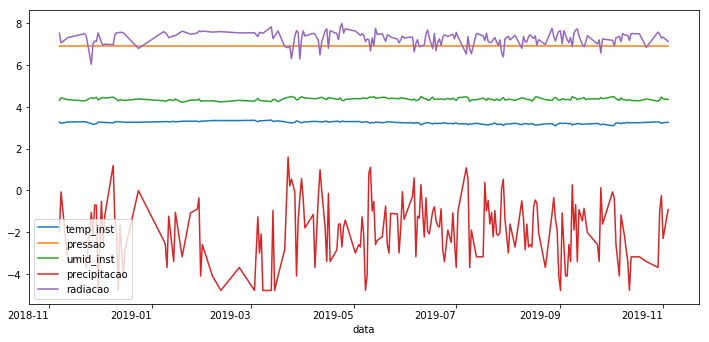

In [7]:
dados6 = dados5[dados5['precipitacao']>0]
dados7 = np.log(dados6)
dados7.plot(figsize=(12, 6),rot=0);

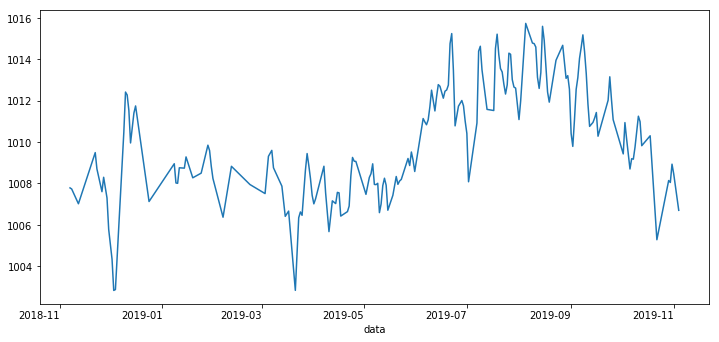

In [17]:
dados6['pressao'].plot(figsize=(12, 6),rot=0);

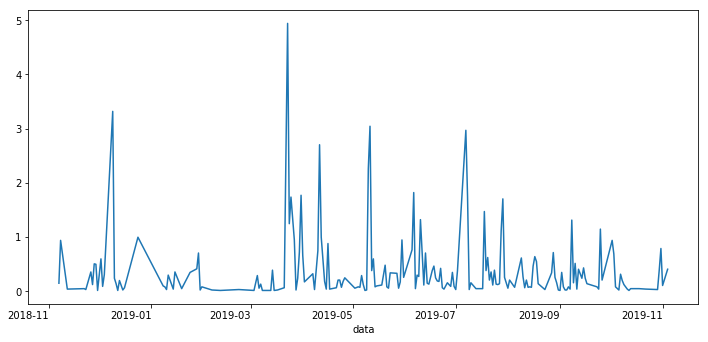

In [18]:
dados6['precipitacao'].plot(figsize=(12, 6),rot=0);

C:\Users\diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


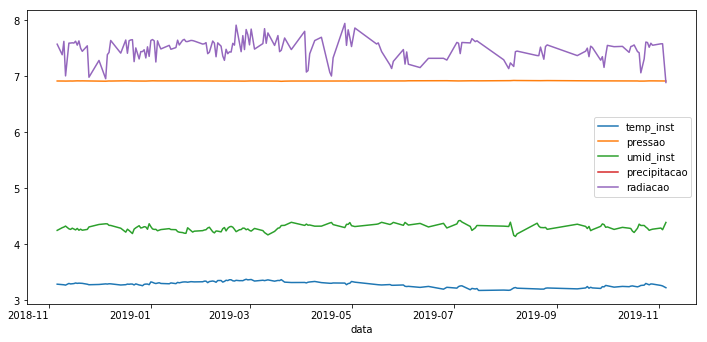

In [9]:
dados8 = dados5[dados5['precipitacao']==0]
dados9 = np.log(dados8)
dados9.plot(figsize=(12, 6),rot=0);